In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
% cd gdrive/MyDrive/project_sp/drnn

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/project_sp/drnn


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
#tf.enable_v2_behavior()

import tensorflow_probability as tfp
tfd = tfp.distributions
import pandas as pd

#to make matplotlib output appear in notebook
%matplotlib inline

from models import model_normal
from utils import utils
from utils import plots
from utils import overhead

In [3]:
#loss function
negloglik = lambda y, p_y: -p_y.log_prob(y)
loss_fun = negloglik
# How large is the dataset?
N = 15000
# number of epochs to train the model for
max_num_epochs = 2000
# define batch size for training
batch_size = 256
# maximum number of hidden units for random search
max_hidden_units = 1800
# learning rate
lr = 0.0001
# number hidden layers
max_num_hidden_layers = 10
#number of predictors
k = 5
#number of sets for random search
num_sets = 150

#filetype
filename = "expnormal5d"
num_files = 10

#model type
modeltype = model_normal

#random seed
rdseed = 20125

#optimizer
optimer = tf.keras.optimizers.Adam
activation_fun = 'relu'

#schedule
schedule = True
earlystop = True
pat = 30

In [4]:
modeltype

<module 'models.model_normal' from '/content/gdrive/MyDrive/project_sp/drnn/models/model_normal.py'>

In [5]:
hu_key = overhead.fitsimdat(num_sets = num_sets, max_num_hidden_layers = max_num_hidden_layers, 
            max_hidden_units = max_hidden_units, rdseed = rdseed,
            filename = filename, num_files = num_files, k = k, modeltype = modeltype, 
            activation_fun = activation_fun, loss_fun = loss_fun, optimer = optimer,
            lr = lr, batch_size = batch_size, max_num_epochs = max_num_epochs, 
            schedule = schedule, earlystop = earlystop, pat = pat,
            distr = "normal", save = True)

doing 1th dataset
<module 'models.model_normal' from '/content/gdrive/MyDrive/project_sp/drnn/models/model_normal.py'>
in fitsimdat:normal
in opt_hunormal
[ 982. 1458.]
[ 889. 1596. 1412.  948.  501.]
[254. 288. 349. 253. 206. 184.]
[ 594.  826. 1302. 1462. 1478. 1292.  888.  502.  336.]
[1096. 1147. 1745. 1333.  845.]
[1134. 1314. 1473.  967.  594.  573.]
[1319. 1684. 1576.]
[1679. 1555.]
[109. 182. 362. 202. 124. 117.]
[1256.  910.]
[ 629.  662.  934. 1052.  720.  560.]
[ 947. 1487. 1024.]
[102. 128.  96.  88.  66.  65.  50.  30.]
[324. 341. 648. 353. 332. 249. 193. 131.]
[ 404.  530. 1013. 1696. 1250.  816.]
[ 672.  794.  888. 1113.  651.  555.]
[1391.]
[ 24.  39.  78. 152. 157. 140.  97.  49.]
[521. 880. 883. 461.]
[ 220.  318.  376.  635. 1248.  944.  713.  506.  362.  283.]
[307.]
[149. 227. 166.  84.  49.  36.  26.  25.  17.  10.]
[394. 478. 516. 961. 582. 409. 337. 207. 175.]
[1128. 1753.]
[412. 458.]
[341. 428. 612. 884. 644. 565.]
[1329.]
[1414. 1589.  892.]
[ 964. 1024. 1047

KeyboardInterrupt: ignored

In [11]:
mydat = pd.read_csv("results/expnormal5d_1.csv")

In [ ]:
mydat = mydat[mydat['testid']==0]

In [ ]:
mydat.head()

,Unnamed: 0,Unnamed: 0.1,x1,x2,x3,x4,x5,y,testid,pred_mean,pred_std
0,0,1,0.537033,0.625292,0.004593,0.734224,0.328873,0.345313,0,0.295070,0.047564
1,1,2,0.351367,0.591927,0.968506,0.868779,0.127359,0.489836,0,0.479302,0.043725
3,3,4,0.952660,0.180396,0.815202,0.148453,0.618569,0.536540,0,0.517241,0.054302
4,4,5,0.242595,0.560549,0.233896,0.652179,0.092178,0.256156,0,0.304620,0.034848
6,6,7,0.722358,0.237015,0.364612,0.102704,0.870099,0.375941,0,0.387788,0.040871


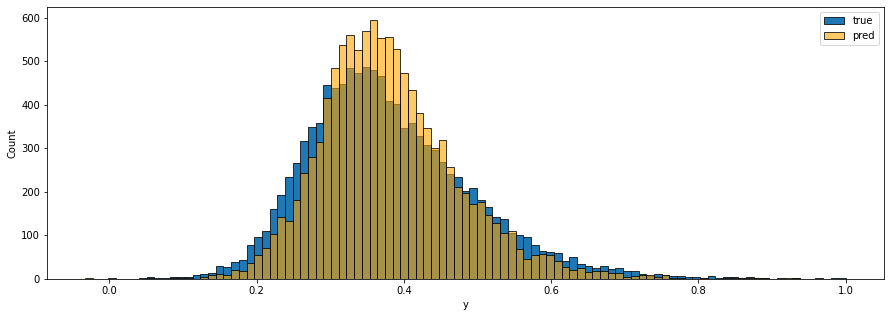

In [ ]:
plots.hists(mydat['pred_mean'], mydat['y'])

In [ ]:
mydat = pd.read_csv("results/expnormal5d_1.csv")

In [12]:
mydat = mydat[mydat['testid']==0]

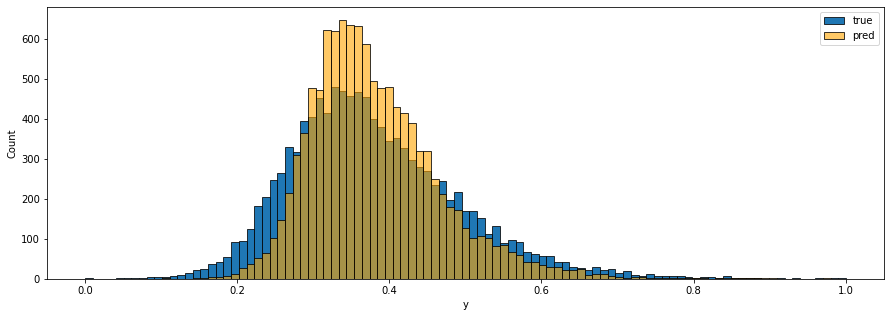

In [13]:
plots.hists(mydat['pred_mean'], mydat['y'])